In [123]:
%reset

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import copy
from skimage import morphology as skimorph
from skimage import filters as skifilter
from skimage import segmentation as skisegment
from skimage import measure as skimeasure

import pySPM 
print(f'PySPM version: {pySPM.__version__}')

%matplotlib inline
mpl.rcParams['figure.dpi'] = 150

PySPM version: 0.2.23


In [3]:
# Get data
filename = 'minicircle.spm'
scan = pySPM.Bruker(filename)
scan.list_channels()

Channels
	S [ZSensor] "Height Sensor"
	S [] "Peak Force Error"
	S [Stiffness] "DMTModulus"
	S [LogStiffness] "LogDMTModulus"
	S [Adhesion] "Adhesion"
	S [Deformation] "Deformation"
	S [Dissipation] "Dissipation"
	S [Height] "Height"


In [4]:
# Load data into variables
topography = scan.get_channel() # Unsure as to what this does

zsensor = scan.get_channel("Height")
force_error = scan.get_channel("Peak Force Error")
dmtModulus = scan.get_channel("DMTModulus")
logDMTModulus = scan.get_channel("LogDMTModulus")
adhesion = scan.get_channel("Adhesion")
deformation = scan.get_channel("Deformation")
dissipation = scan.get_channel("Dissipation")
height = scan.get_channel("Height")

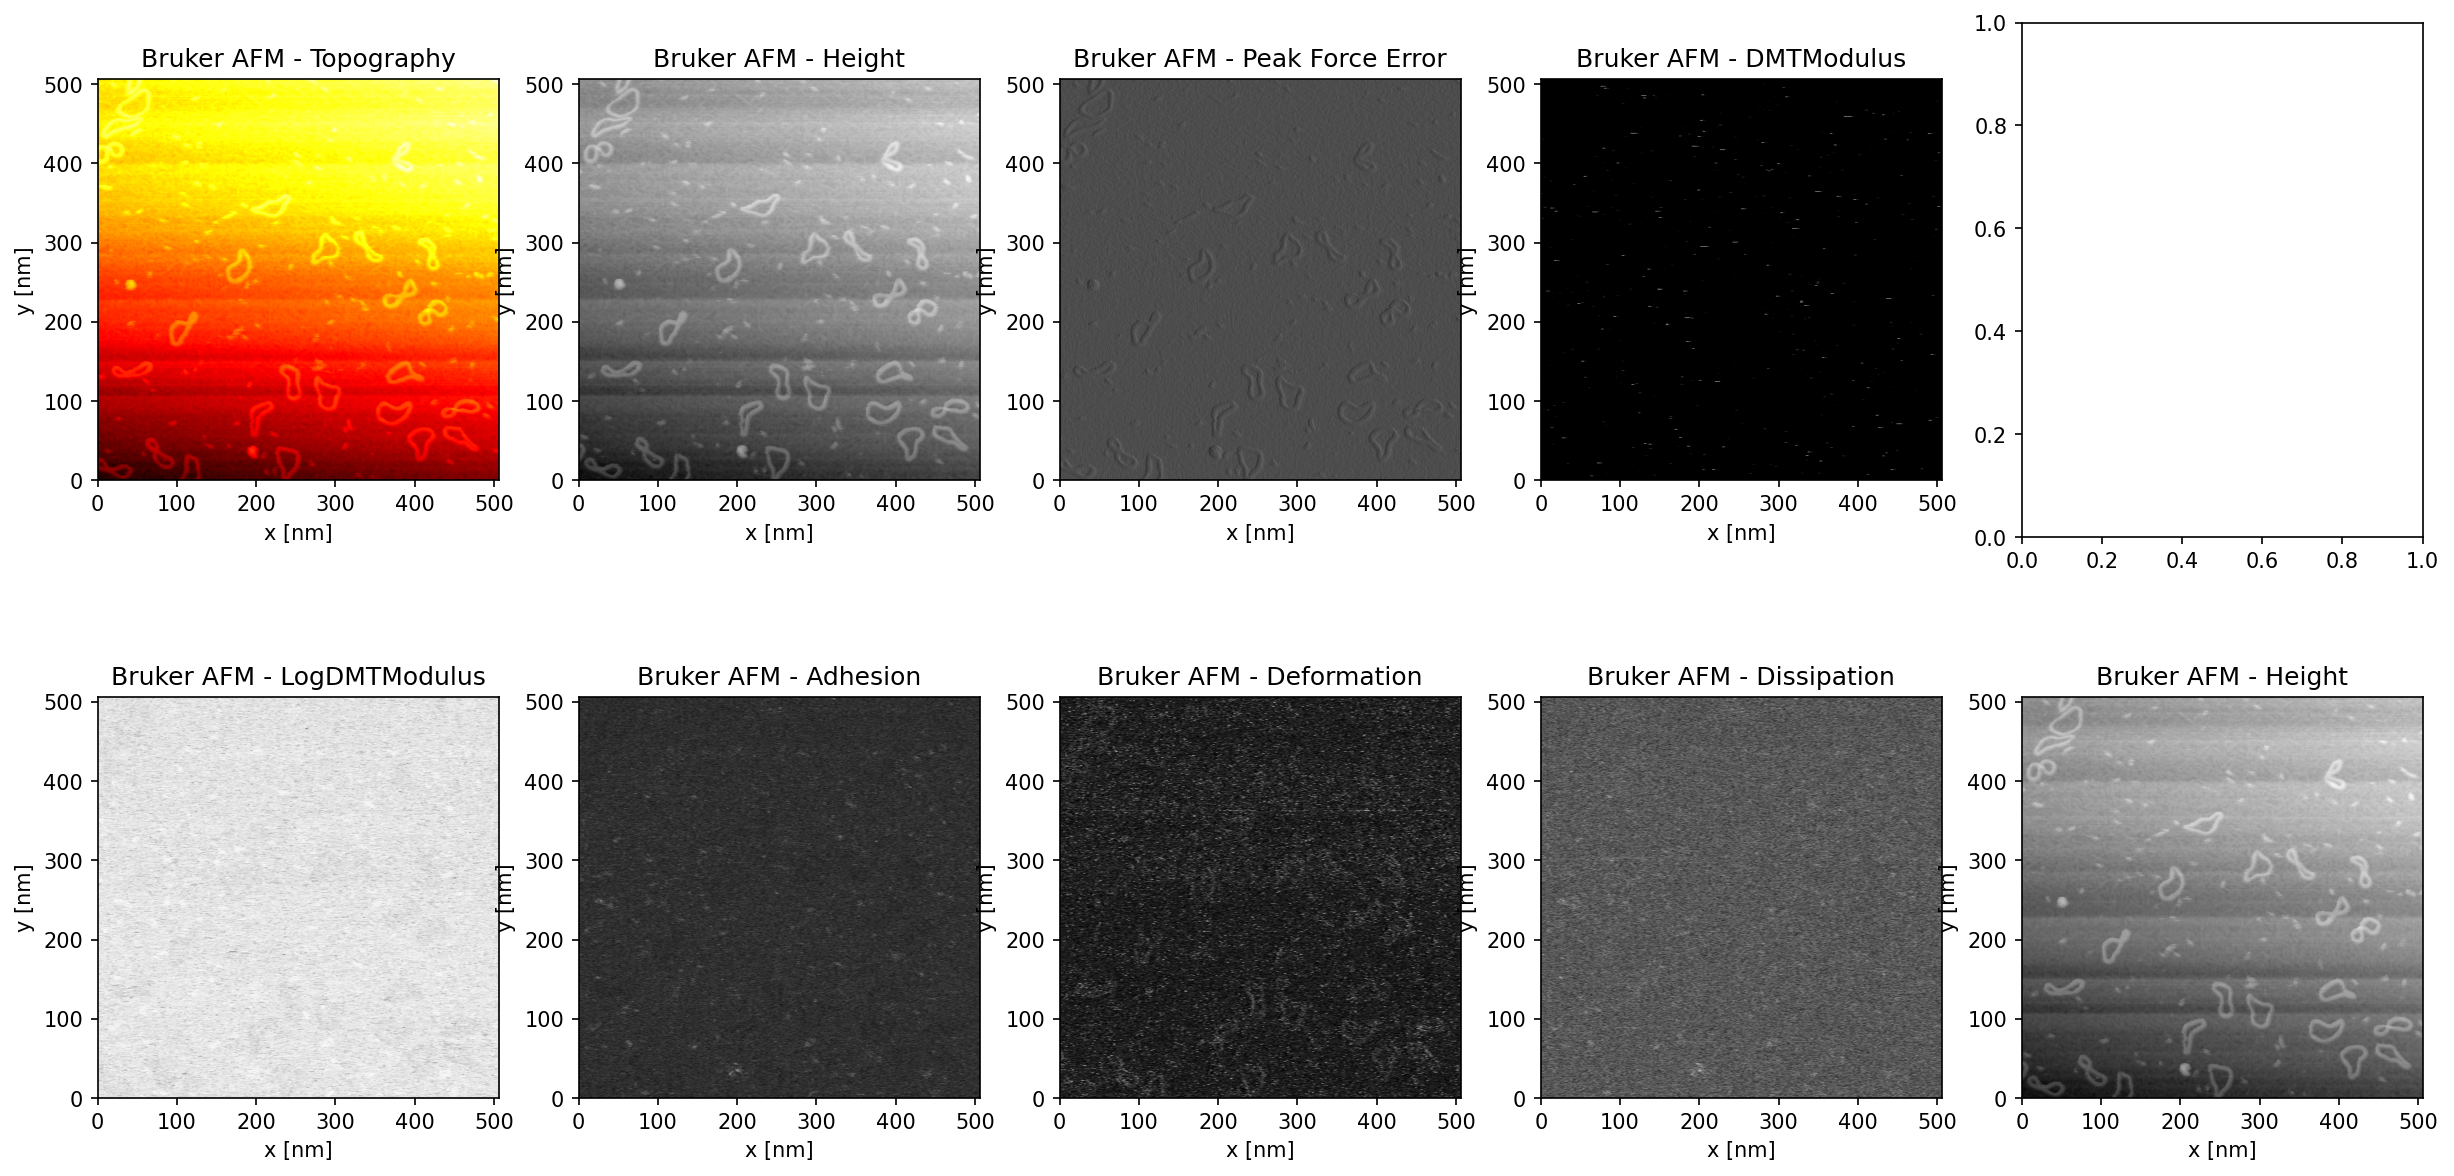

In [5]:
# Add figures
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

topography.show(ax=ax[0,0])
zsensor.show(ax=ax[0,1])
force_error.show(ax=ax[0,2])
dmtModulus.show(ax=ax[0,3])
logDMTModulus.show(ax=ax[1,0])
adhesion.show(ax=ax[1,1])
deformation.show(ax=ax[1,2])
dissipation.show(ax=ax[1,3])
height.show(ax=ax[1,4])


In [8]:
# Set the data that we are going to try the corrections on
data = height

Text(0.5, 1.0, 'Slope correction')

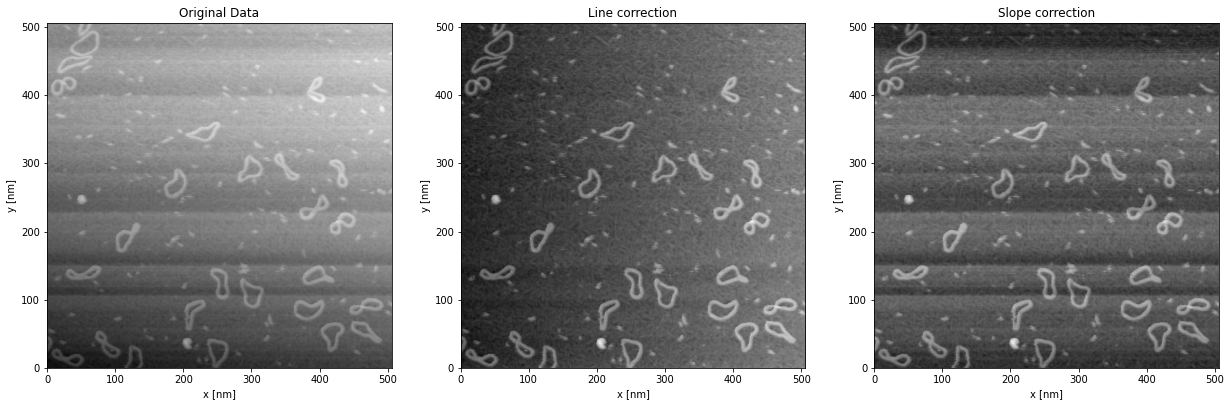

In [136]:
# Plane and line correction
data_corrected_lines = data.correct_lines(inline=False)
data_corrected_plane = data.correct_plane(inline=False)

fig, ax = plt.subplots(1, 3, figsize=(21, 7))
data.show(ax = ax[0])
ax[0].set_title("Original Data")
data_corrected_lines.show(ax = ax[1])
ax[1].set_title("Line correction")
data_corrected_plane.show(ax = ax[2])
ax[2].set_title("Slope correction")


Text(0.5, 1.0, 'Median of differences corrected')

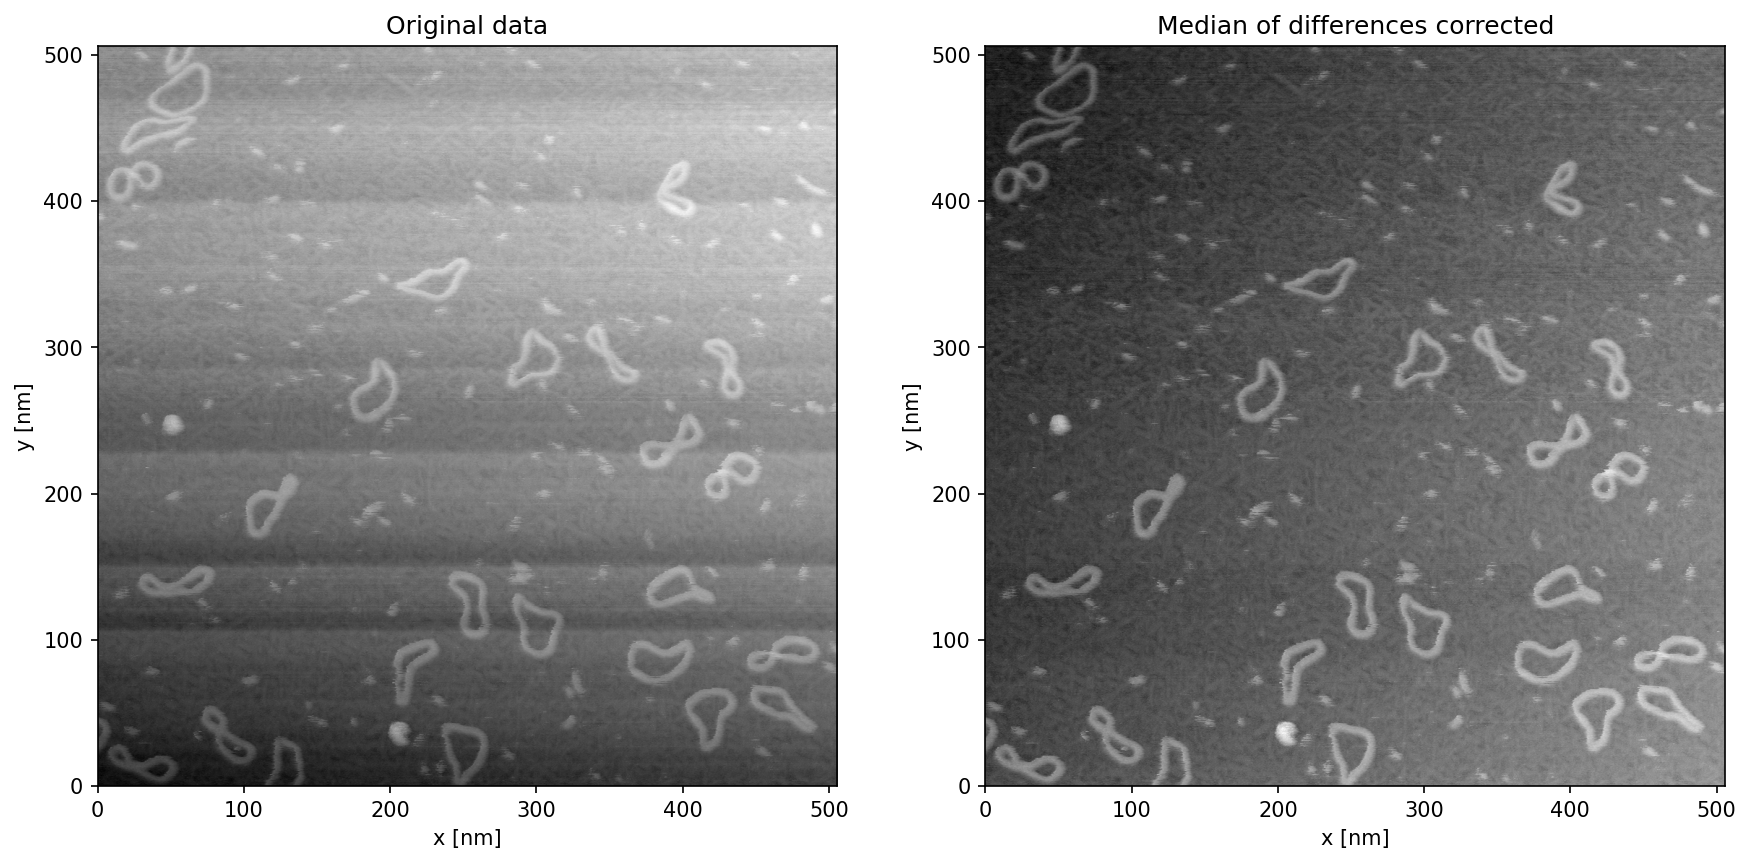

In [9]:
# Median of difference correction
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Make a copy of the dataset
data_copy1 = copy.deepcopy(data)
data_copy1.correct_median_diff()
data.show(ax = ax[0])
ax[0].set_title("Original data")
data_copy1.show(ax = ax[1])
ax[1].set_title("Median of differences corrected")

Text(0.5, 1.0, 'Scars correction')

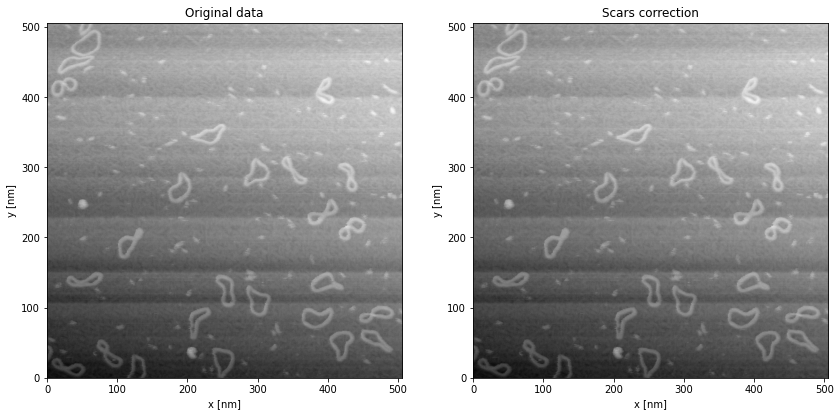

In [138]:
# Scars correction
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
# Make a copy of the dataset
data_copy2 = copy.deepcopy(data)
data_copy2.filter_scars_removal(0.7, inline = False)
data.show(ax = ax[0])
ax[0].set_title("Original data")
data_copy2.show(ax = ax[1])
ax[1].set_title("Scars correction")


Text(0.5, 1.0, 'Polynomial correction on background mask')

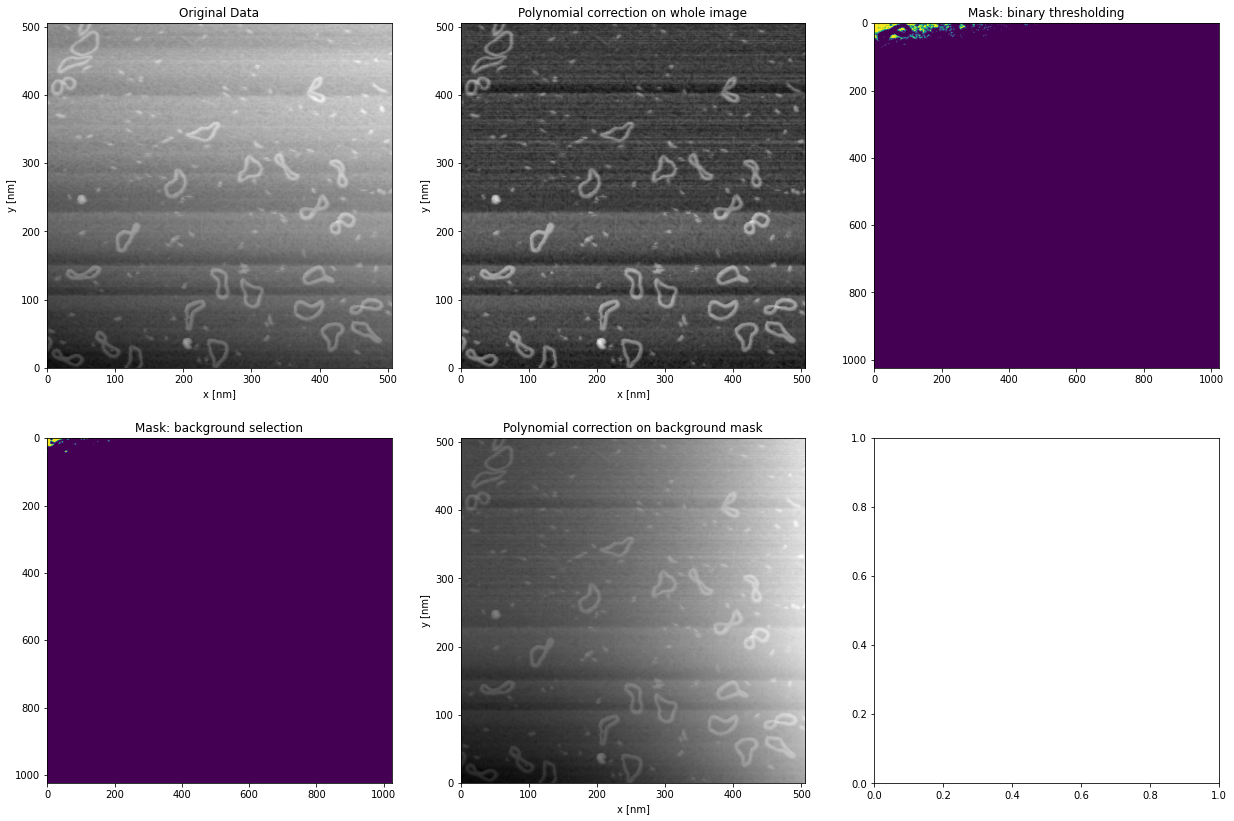

In [139]:
# Polynomial background correction
from skimage.morphology import binary_erosion, disk
data_copy3 = data.corr_fit2d(inline=False).offset([[10, 0, 10, 511]]).filter_scars_removal()

mask0 = data.get_bin_threshold(0.1, high=False)
mask1 = binary_erosion(mask0, disk(3))

data_copy3_2 = data_copy3.corr_fit2d(mask=mask1, inline=False).offset([[10, 0, 10, 511]]).filter_scars_removal().zero_min()

fig, ax = plt.subplots(2, 3, figsize = (21, 14))
ax = np.ravel(ax)

data.show(ax = ax[0])
ax[0].set_title('Original Data')

data_copy3.show(ax = ax[1])
ax[1].set_title('Polynomial correction on whole image')

ax[2].imshow(mask0)
ax[2].set_title('Mask: binary thresholding')

ax[3].imshow(mask1)
ax[3].set_title('Mask: background selection')

data_copy3_2.show(ax = ax[4])
ax[4].set_title('Polynomial correction on background mask')



Text(0.5, 1.0, 'Testing parameters')

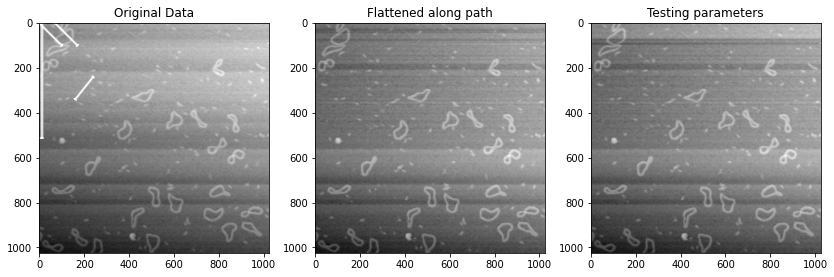

In [149]:
# Flatten data along a path

fig, ax = plt.subplots(1, 3, figsize = (14, 7))

data_copy4 = copy.deepcopy(data)
data_copy4 = data_copy4.filter_scars_removal(inline = False).offset([
    [10, 0, 10, 511],
    [70, 0, 170, 100],
    [240, 240, 160, 340]], ax = ax[0], width = 10, alpha = 0.2, axPixels = True)

# Testing parameters to see what they do
data_copy5 = copy.deepcopy(data)
data_copy5 = data_copy4.filter_scars_removal(inline = False).offset([
    [100, 100, 0, 1],
    [1, 0, 0, 1],
    [1, 0, 0, 1]], ax = ax[0], width = 10, alpha = 0.2, axPixels = True)

data.show(ax = ax[0], pixels = True)
ax[0].set_title('Original Data')
data_copy4.show(ax = ax[1], pixels = True)
ax[1].set_title('Flattened along path')
data_copy5.show(ax = ax[2], pixels = True)
ax[2].set_title('Testing parameters')

{'label': array([21]), 'bbox-0': array([163]), 'bbox-1': array([16]), 'bbox-2': array([1016]), 'bbox-3': array([992])}


Text(0.5, 1.0, 'Skeletonize 3d')

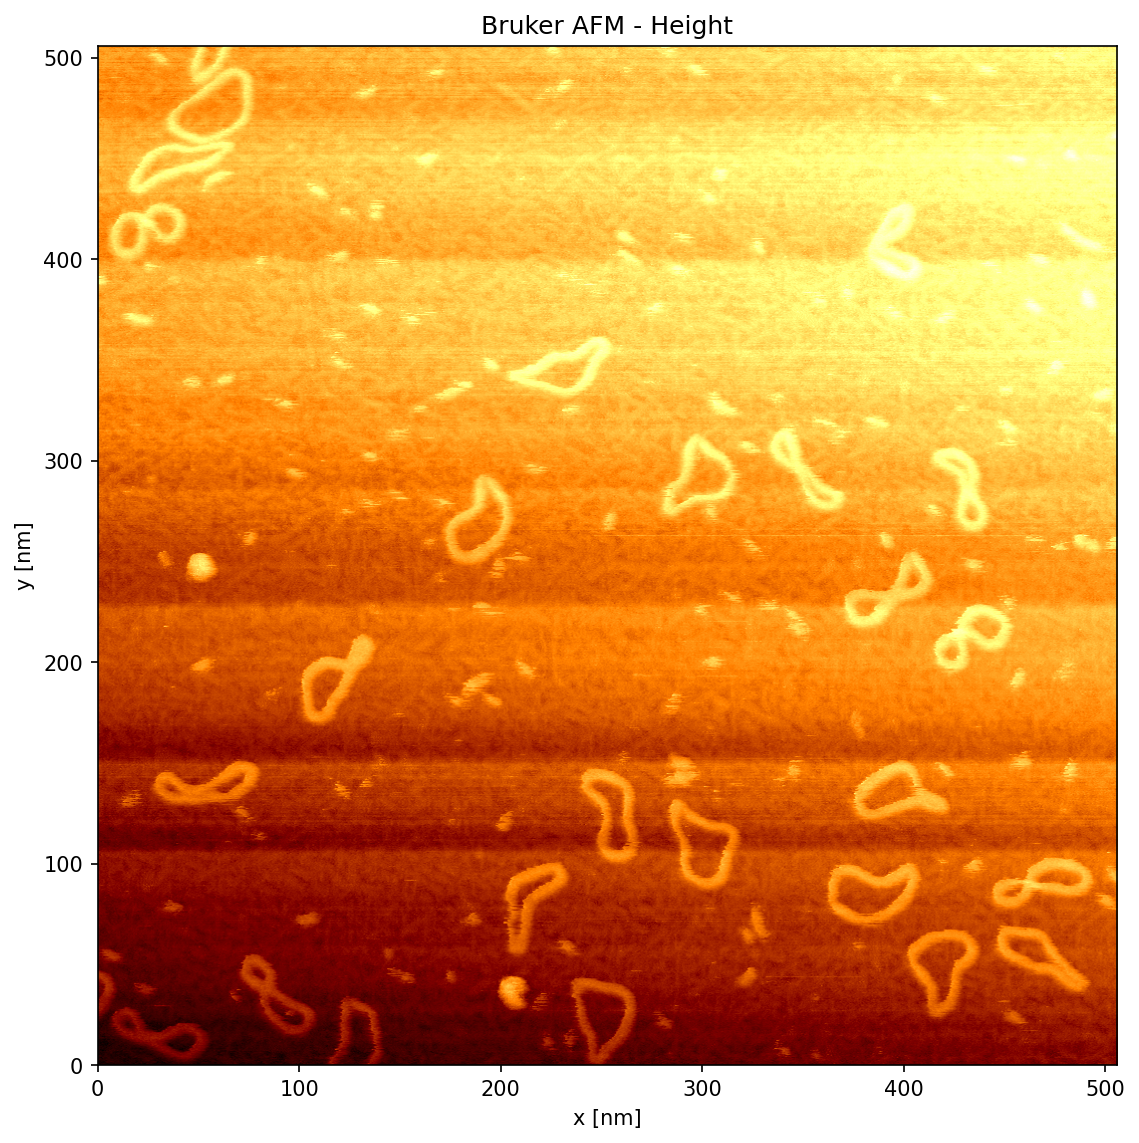

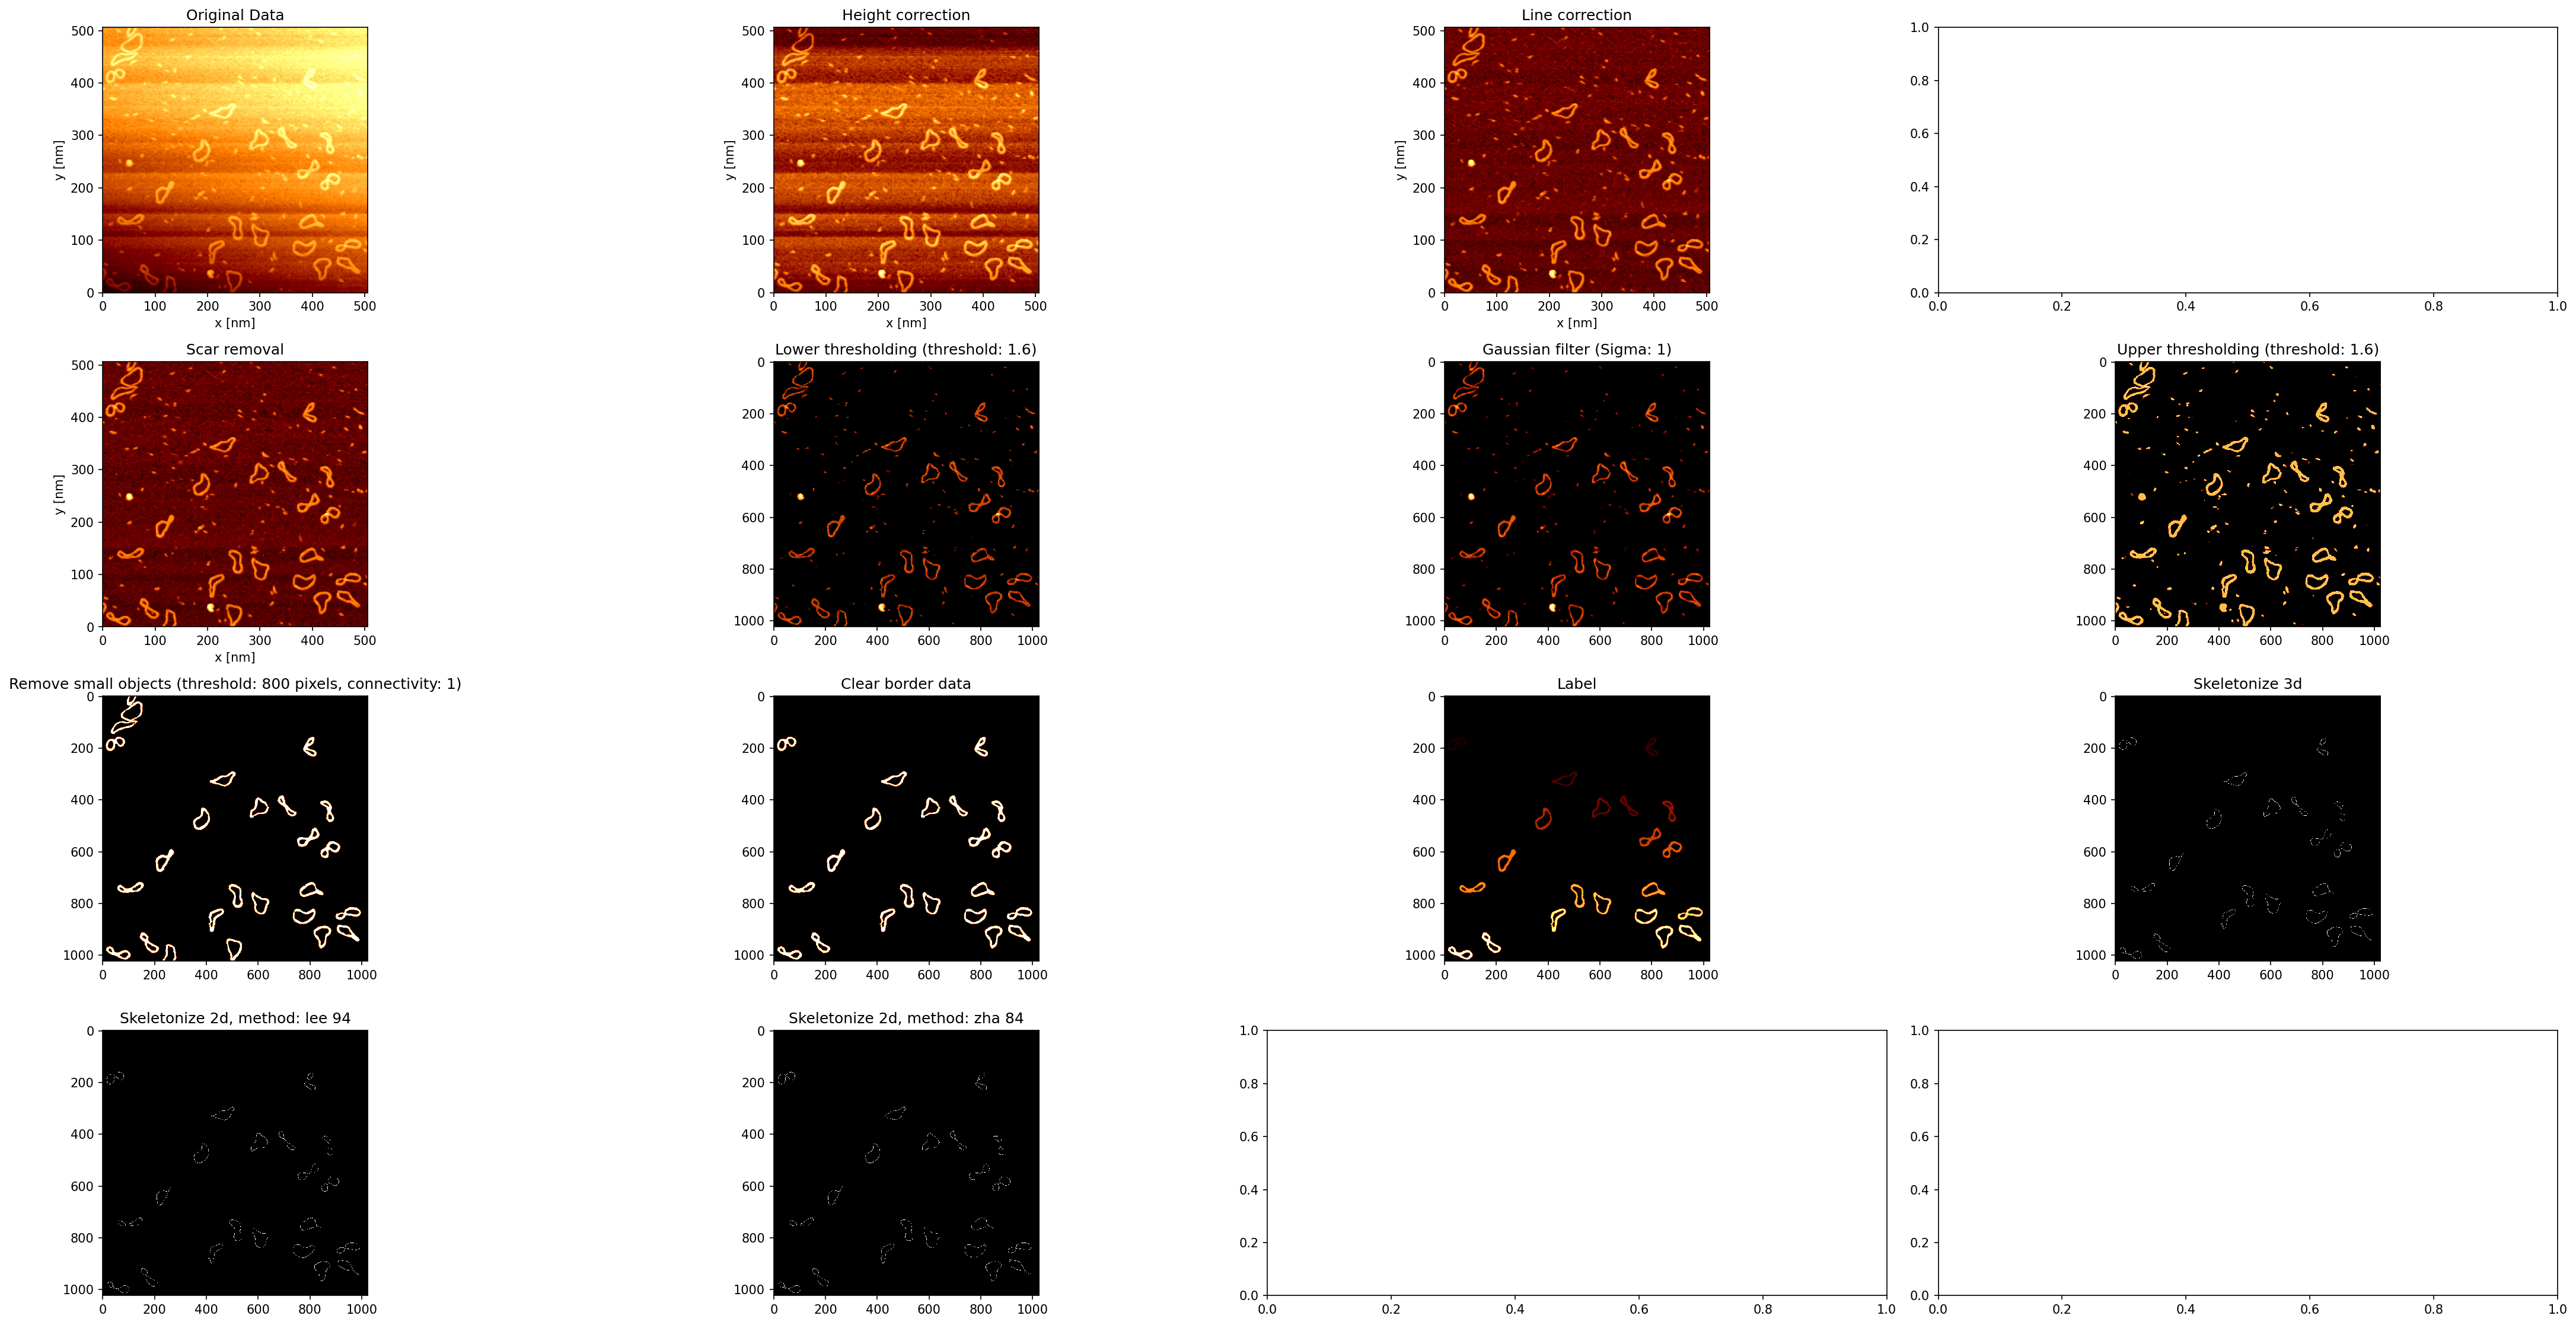

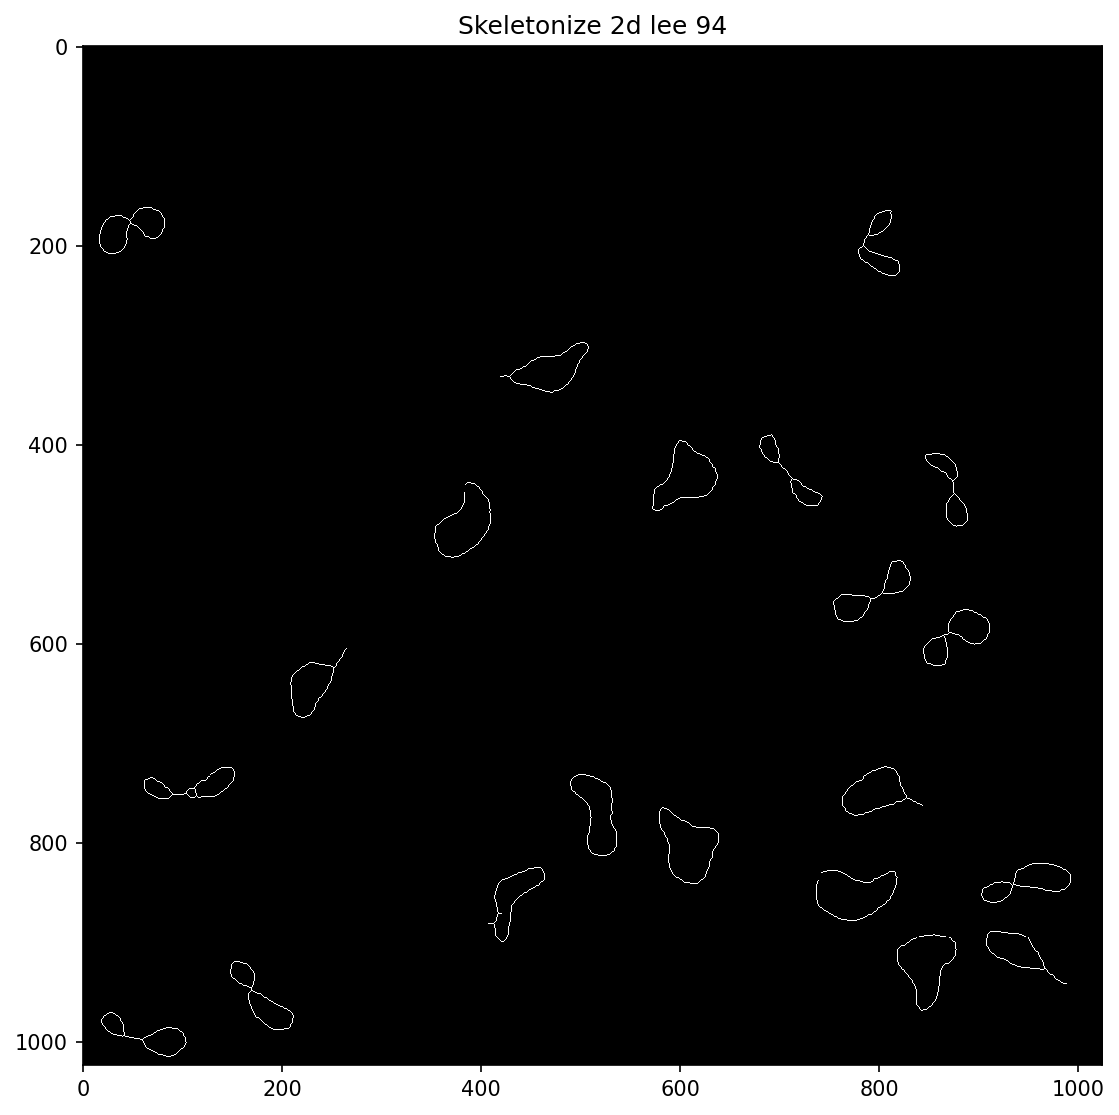

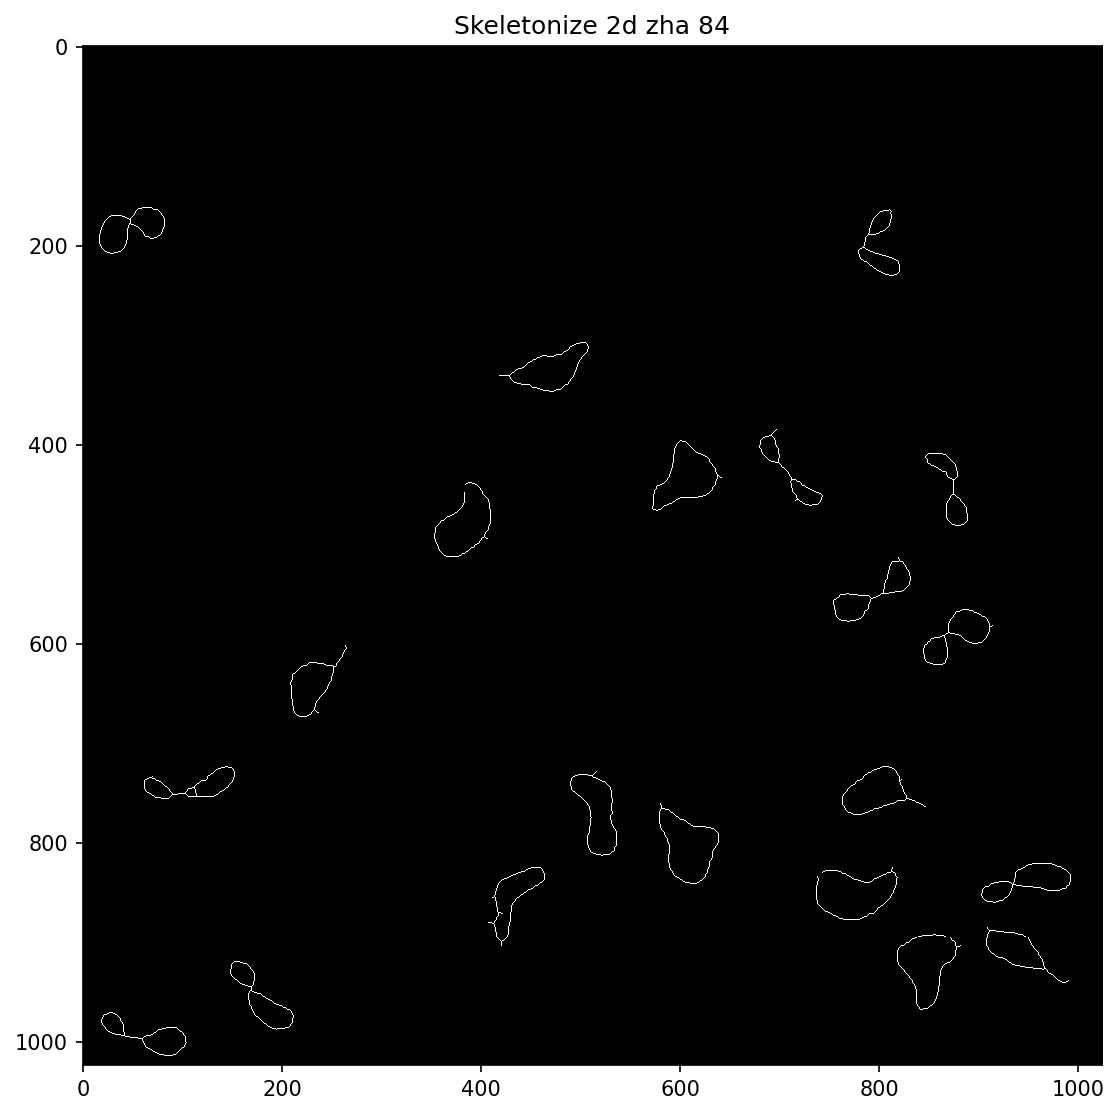

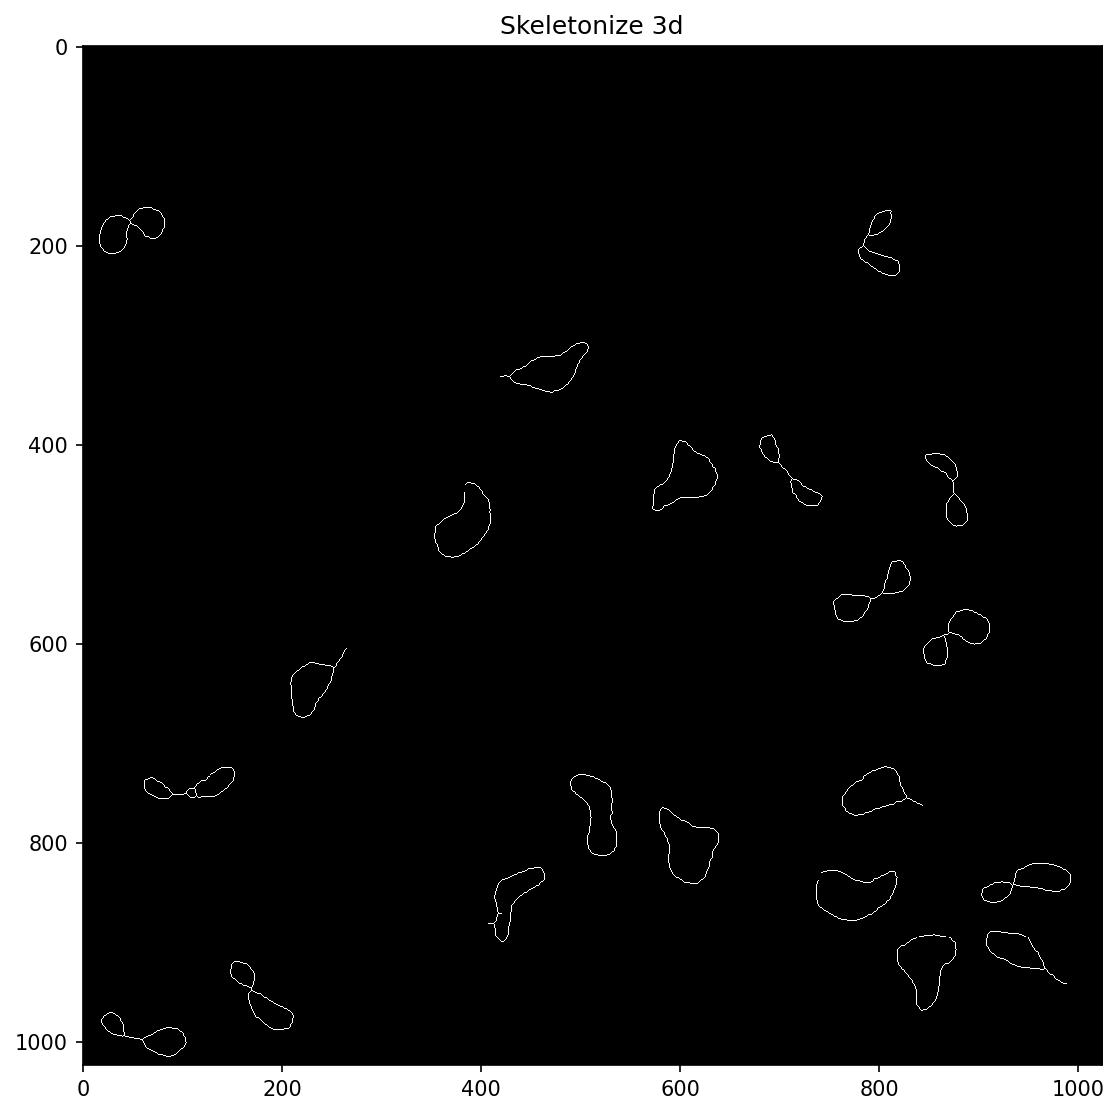

In [15]:
# Trying some of these processes together
colmap = 'afmhot'

figbig, axbig = plt.subplots(1, 1, figsize = (18, 9))
data.show(ax = axbig, cmap = colmap)

fig, ax = plt.subplots(4, 4, figsize = (30, 15))



# Get original data
data_copy6 = copy.deepcopy(data)
data_copy6.show(ax = ax[0, 0], cmap = colmap)
ax[0, 0].set_title('Original Data')

# Height correction
data_copy6 = data_copy6.correct_plane()
data_copy6.show(ax = ax[0, 1], cmap = colmap)
ax[0, 1].set_title('Height correction')

# Line correction - remove lines across afm data
data_copy6 = data_copy6.correct_lines()
data_copy6.show(ax = ax[0, 2], cmap = colmap)
ax[0, 2].set_title('Line correction')

# # Median difference correction
data_copy6.correct_median_diff()
data_copy6.show(ax = ax[0, 3], cmap = colmap)
ax[0, 3].set_title('Median difference correction')

# Remove scars
data_copy6 = data_copy6.filter_scars_removal(0.7, inline = False)
data_copy6.show(ax = ax[1, 0], cmap = colmap)
ax[1, 0].set_title('Scar removal')



# Set all points lower than a threshold to zero
threshold_lowerbrightness = 1.6
data_pixelArray = np.array(data_copy6.pixels)
data_pixelArray[data_pixelArray < threshold_lowerbrightness] = 0
data_pixelArray = np.flipud(data_pixelArray)
ax[1, 1].imshow(data_pixelArray, cmap = colmap, interpolation="nearest")
ax[1, 1].set_title(f'Lower thresholding (threshold: {threshold_lowerbrightness})')

# Gaussian filter to smooth data 
gaussian_sigma_value = 1
data_pixelArray = skifilter.gaussian(data_pixelArray, gaussian_sigma_value)
ax[1, 2].imshow(data_pixelArray, cmap = colmap)
ax[1, 2].set_title(f'Gaussian filter (Sigma: {gaussian_sigma_value})')


# Set all points greater than a threshold to 1
threshold_upperbrightness = 1.6
data_pixelArray[data_pixelArray > threshold_upperbrightness] = 1
ax[1, 3].imshow(data_pixelArray, cmap = colmap, interpolation="nearest")
ax[1, 3].set_title(f'Upper thresholding (threshold: {threshold_upperbrightness})')

# Convert to integer values
data_pixelArray = data_pixelArray.astype(int)

# Convert to boolean values
data_pixelArray = np.array(data_pixelArray, bool)

# Remove small objects
threshold_lowersize = 800
threshold_connectivity = 1
data_pixelArray = skimorph.remove_small_objects(data_pixelArray, threshold_lowersize, connectivity=threshold_connectivity)
ax[2, 0].imshow(data_pixelArray, cmap = colmap)
ax[2, 0].set_title(f'Remove small objects (threshold: {threshold_lowersize} pixels, connectivity: {threshold_connectivity})')

# Clear data near the border
data_pixelArray = skisegment.clear_border(data_pixelArray)
ax[2, 1].imshow(data_pixelArray, cmap = colmap)
ax[2, 1].set_title(f'Clear border data')

# Label - detects gaps in pixel groups
data_pixelArray = skimeasure.label(data_pixelArray)
ax[2, 2].imshow(data_pixelArray, cmap = colmap)
ax[2, 2].set_title(f'Label')

# Skeletonize
skeleton3d = skimorph.skeletonize_3d(data_pixelArray)
ax[2, 3].imshow(skeleton3d, cmap = colmap, interpolation="nearest")
ax[2, 3].set_title('Skeletonize 3d')

skeleton2d_lee = skimorph.skeletonize(np.array(data_pixelArray, bool), method="lee")
skeleton2d_zha = skimorph.skeletonize(np.array(data_pixelArray, bool))

ax[3, 0].imshow(skeleton2d_lee, cmap = colmap, interpolation="nearest")
ax[3, 0].set_title('Skeletonize 2d, method: lee 94')

ax[3, 1].imshow(skeleton2d_zha, cmap = colmap, interpolation="nearest")
ax[3, 1].set_title('Skeletonize 2d, method: zha 84')


# Measure properties of the regions
regions = skimeasure.regionprops_table(skeleton3d)
print(regions)

fig.tight_layout()


# Show close-ups of the different skeleton methods
fig, ax = plt.subplots(1, 1, figsize = (18, 9))
ax.imshow(skeleton2d_lee, cmap = colmap, interpolation="nearest")
ax.set_title('Skeletonize 2d lee 94')

fig, ax = plt.subplots(1, 1, figsize = (18, 9))
ax.imshow(skeleton2d_zha, cmap = colmap, interpolation="nearest")
ax.set_title('Skeletonize 2d zha 84')

fig, ax = plt.subplots(1, 1, figsize = (18, 9))
ax.imshow(skeleton3d, cmap = colmap, interpolation="nearest")
ax.set_title('Skeletonize 3d')



